# **1000 fleas are jumping from one dog to another at random**


*   We need to plot the number of fleas on each of them at some time
*   And we need to plot the probability distribution 



In [7]:
import numpy as np
from tqdm.notebook import tqdm
import random 
import matplotlib.pyplot as plt


In [8]:
N=1000              ############### number of fleas #############
Dog_fleas1,Dog_fleas2=[N],[0] ########### a macrostate description #############
Dog_flea_1=np.arange(1,N+1,1)
Dog_flea_2=np.array([])    ############ a microstate description #############
n_list=[0]
print(Dog_fleas1)
m=Dog_fleas1[-1]
S_list=[N*np.log(N) - m*np.log(m) -(N- m)*np.log(N - m) if m!=N else 0  ]
Histogram_data=[]

[1000]


In [9]:
events=100000
d=1000
for i in tqdm(range(events)):
    x=random.randint(0,N)
    if x in Dog_flea_1:
        Dog_fleas1.append(Dog_fleas1[-1]-1)
        Dog_fleas2.append(Dog_fleas2[-1]+1)          ########### evolving the macrostate ##########
        Dog_flea_1=np.delete(Dog_flea_1,np.where(Dog_flea_1==x))
        Dog_flea_2=np.append(Dog_flea_2,[x])
        ############# after every time step the one of the fleas will jump from one dog to other ###############
        
    else:
        Dog_fleas1.append(Dog_fleas1[-1]+1)
        Dog_fleas2.append(Dog_fleas2[-1]-1)
        Dog_flea_2=np.delete(Dog_flea_2,np.where(Dog_flea_1==x))
        Dog_flea_1=np.append(Dog_flea_1,[x])
    m=Dog_fleas1[-1]
    if m==N:
        S_list.append(0)
    else:
        S_list.append(N*np.log(N) - m*np.log(m) - (N-m)*np.log(N - m))
    if i>d:
        Histogram_data.append(m)
        
    n_list.append(n_list[-1]+1)
    
        
    

Text(0.5, 1.0, 'THE DOG FLEA MODEL')

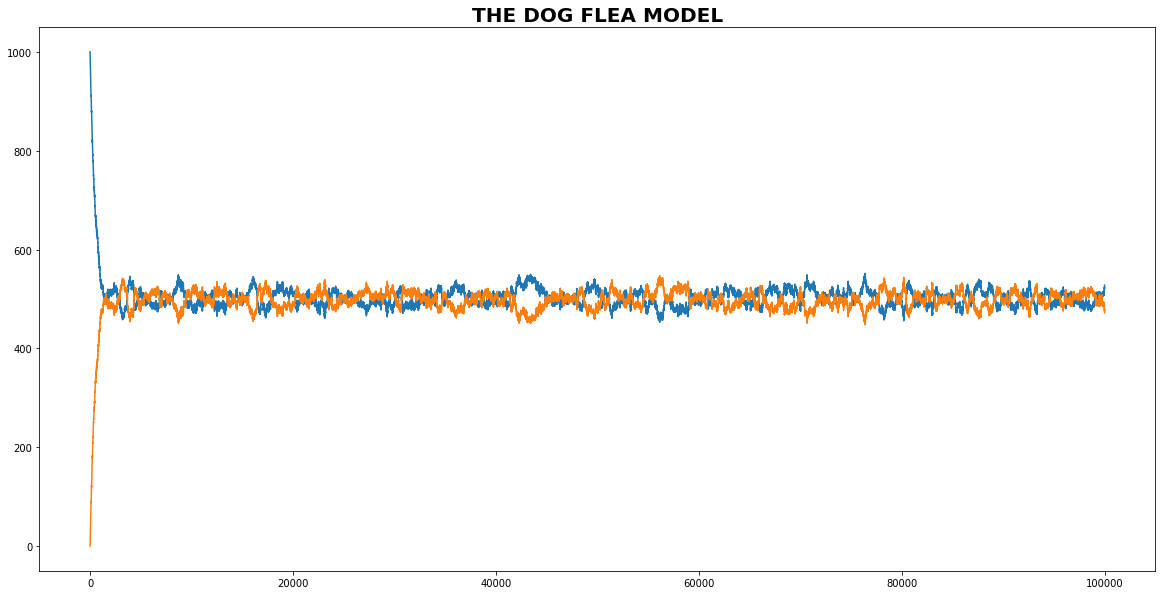

In [10]:
plt.figure(figsize=(20,10))
plt.plot(n_list,Dog_fleas1)
plt.plot(n_list,Dog_fleas2)
plt.title('THE DOG FLEA MODEL',fontweight='bold',fontsize='20')


Text(0.5, 1.0, 'ENTROPY = $N\\ln(N) - m\\ln(m) - (N-m)\\ln(N-m)    $')

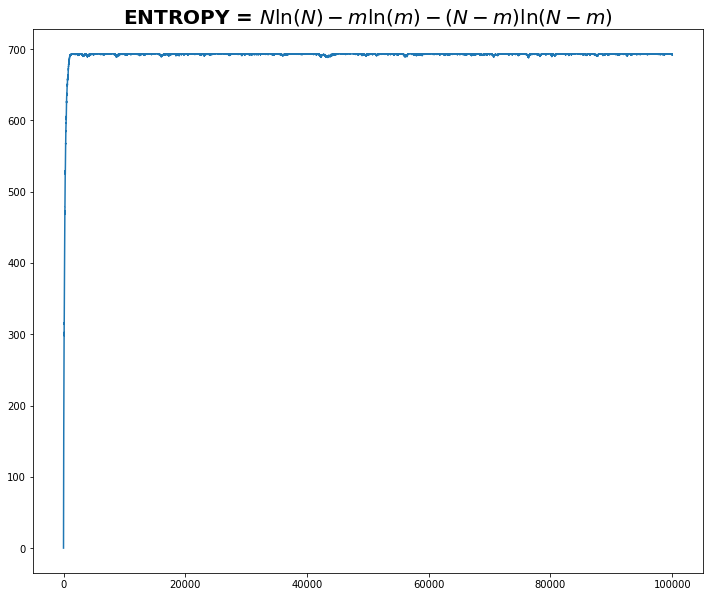

In [11]:
plt.figure(figsize=(12,10))
plt.plot(n_list,S_list)
plt.title(r'ENTROPY = $N\ln(N) - m\ln(m) - (N-m)\ln(N-m)    $',fontweight='bold',fontsize='20')

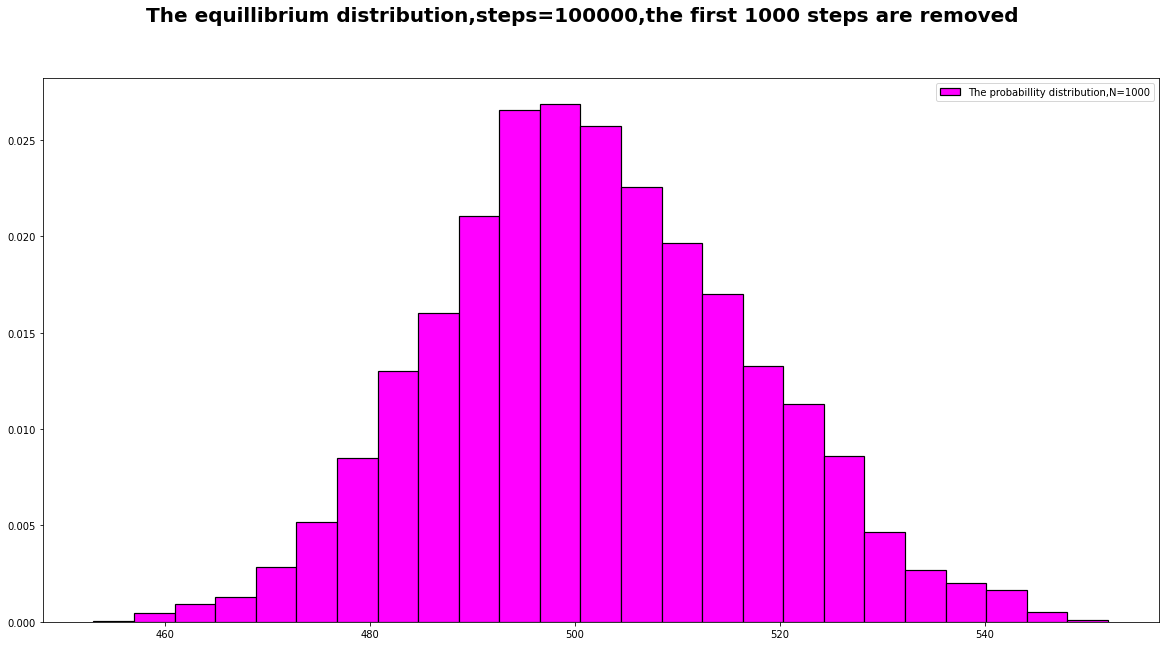

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
nbins=25
n, bins, patches = plt.hist(Histogram_data,bins=nbins,density=True,label='The probabillity distribution,N={}'.format(N),edgecolor='black', linewidth=1.2, facecolor='fuchsia')
fig.suptitle(f'The equillibrium distribution,steps={events},the first {d} steps are removed',fontweight='bold',fontsize='20')
ax.legend()